<a href="https://colab.research.google.com/github/praveen37bn/22f3003157/blob/main/Praveen_22f3003157_notebook_t12025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):

        filename = "submission.csv"
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/submission.csv
/kaggle/input/System-Threat-Forecaster/submission.csv


# Data Loading

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
test_df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

# Examining the Dataset

In [ ]:
train_df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [ ]:
train_df.shape

(100000, 76)

# Exploratory Data Analysis
	1. Visualization (histograms, box plots, scatter plots)
	2. Correlation analysis
	3. Handling missing values and outliers

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [ ]:
train_df.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [ ]:
train_df.describe(include = ['object'])

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,PlatformType,Processor,OSVersion,OsPlatformSubRelease,OSBuildLab,...,OSBranch,OSEdition,OSSkuFriendlyName,OSInstallType,AutoUpdateOptionsName,OSGenuineState,LicenseActivationChannel,FlightRing,DateAS,DateOS
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,99976
unique,99835,2,37,69,2735,4,3,7,9,281,...,13,20,18,9,6,4,6,7,2695,112
top,8e0523438a5ca48323f50b2c47f6d31a,win8defender,1.1.15200.1,4.18.1807.18075,1.273.1420.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail,2018-08-15 06:29:00,2018-08-14
freq,2,99771,45219,62119,1274,98344,91262,98368,45837,42964,...,46909,39275,39273,32033,45154,89860,52195,94153,1274,20905


In [ ]:
pd.set_option('Display.max_rows', 80)
train_df.isnull().sum()

MachineID                               0
ProductName                             0
EngineVersion                           0
AppVersion                              0
SignatureVersion                        0
IsBetaUser                              0
RealTimeProtectionState                66
IsPassiveModeEnabled                    0
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
HasTpm                                  0
CountryID                               0
CityID                                623
GeoRegionID                             0
LocaleEnglishNameID                     0
PlatformType                            0
Processor                               0
OSVersion                               0
OSBuildNumber                           0
OSProductSuite                          0
OsPlatformSubRelease                    0
OSBuildLab                              0
SKUEditionName                    

In [ ]:
(train_df == ' ').sum()

MachineID                             0
ProductName                           0
EngineVersion                         0
AppVersion                            0
SignatureVersion                      0
IsBetaUser                            0
RealTimeProtectionState               0
IsPassiveModeEnabled                  0
AntivirusConfigID                     0
NumAntivirusProductsInstalled         0
NumAntivirusProductsEnabled           0
HasTpm                                0
CountryID                             0
CityID                                0
GeoRegionID                           0
LocaleEnglishNameID                   0
PlatformType                          0
Processor                             0
OSVersion                             0
OSBuildNumber                         0
OSProductSuite                        0
OsPlatformSubRelease                  0
OSBuildLab                            0
SKUEditionName                        0
IsSystemProtected                     0


In [ ]:
(train_df.isin(['UNKNOWN', 'Unspecified'])).sum()

MachineID           0
ProductName         0
EngineVersion       0
AppVersion          0
SignatureVersion    0
                   ..
IsGamer             0
RegionIdentifier    0
DateAS              0
DateOS              0
target              0
Length: 76, dtype: int64

# Data Visualisation And Feature engineering

In [ ]:
train_df.replace(['UNKNOWN', 'Unspecified'], np.nan, inplace=True)

In [ ]:
numerical_features = train_df.select_dtypes(include=['number']).columns
categorical_features = train_df.select_dtypes(include=['object']).columns


In [ ]:
numerical_features

Index(['IsBetaUser', 'RealTimeProtectionState', 'IsPassiveModeEnabled',
       'AntivirusConfigID', 'NumAntivirusProductsInstalled',
       'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID',
       'GeoRegionID', 'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite',
       'IsSystemProtected', 'AutoSampleSubmissionEnabled', 'SMode',
       'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID',
       'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID',
       'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges',
       'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID',
       'OSUILocaleID', 'IsPortableOS', 'IsFlightsDisabled',
       'FirmwareManufacturerID', 'FirmwareVersionID', 'IsSecureBootEnabled',
       'IsVirtua

In [ ]:
categorical_features

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion',
       'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName',
       'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType', 'ChassisType',
       'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch',
       'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
       'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
       'FlightRing', 'DateAS', 'DateOS'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart: Target Distribution  

This count plot visualizes the distribution of the `target` variable in the dataset.  


In [ ]:
plt.figure(figsize=(6, 4))

sns.countplot(x='target', data=train_df)

rating_value = train_df['target'].value_counts()
for index, value in enumerate(rating_value):
    plt.text(index, value + 5, str(value), ha='center')

plt.show()

NameError: name 'plt' is not defined

# Bar chart: IsSystemProtected  

A count plot is used to visualize the distribution of the `IsSystemProtected` feature.  

This plot provides insights into how many systems has Active Protection.  

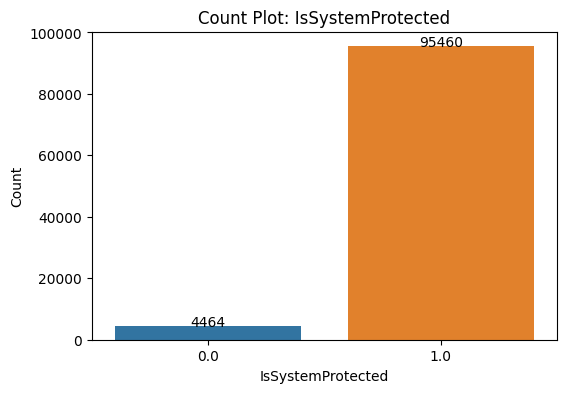

In [ ]:

plt.figure(figsize=(6, 4))

ax = sns.countplot(x='IsSystemProtected', data=train_df)

rating_value = train_df['IsSystemProtected'].value_counts()
for index, value in rating_value.items():
    plt.text(index, value + 5, str(value), ha='center')

plt.title('Count Plot: IsSystemProtected')
plt.xlabel('IsSystemProtected')
plt.ylabel('Count')
plt.show()

0
1
2
3
4
5
6
7
8
9


# Box Plot: Target vs NumAntivirusProductsInstalled  

A box plot is used to visualize the distribution of `NumAntivirusProductsInstalled` across different `target` values.  
  



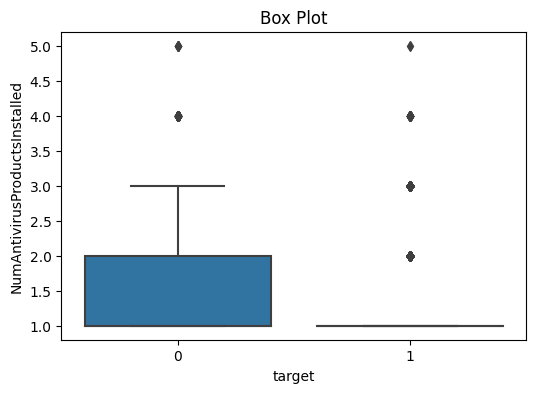

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x= 'target', y = 'NumAntivirusProductsInstalled', data = train_df)
plt.title('Box Plot')
plt.show()

# Violin Plot: Target vs NumAntivirusProductsInstalled  

A violin plot is used to visualize the distribution of `NumAntivirusProductsInstalled` across different `target` values.  


This plot provides insights into how the number of installed antivirus products varies with the target variable.  

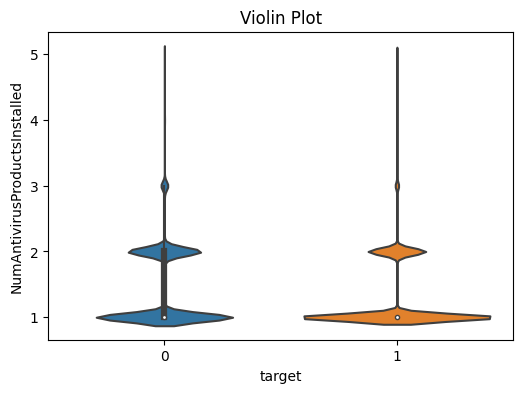

In [ ]:
plt.figure(figsize=(6,4))
sns.violinplot(x= 'target', y = 'NumAntivirusProductsInstalled', data = train_df)
plt.title('Violin Plot')
plt.show()

# Heatmap of Numerical Feature Correlations  

A heatmap is used to visualize the correlation between numerical features.  


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


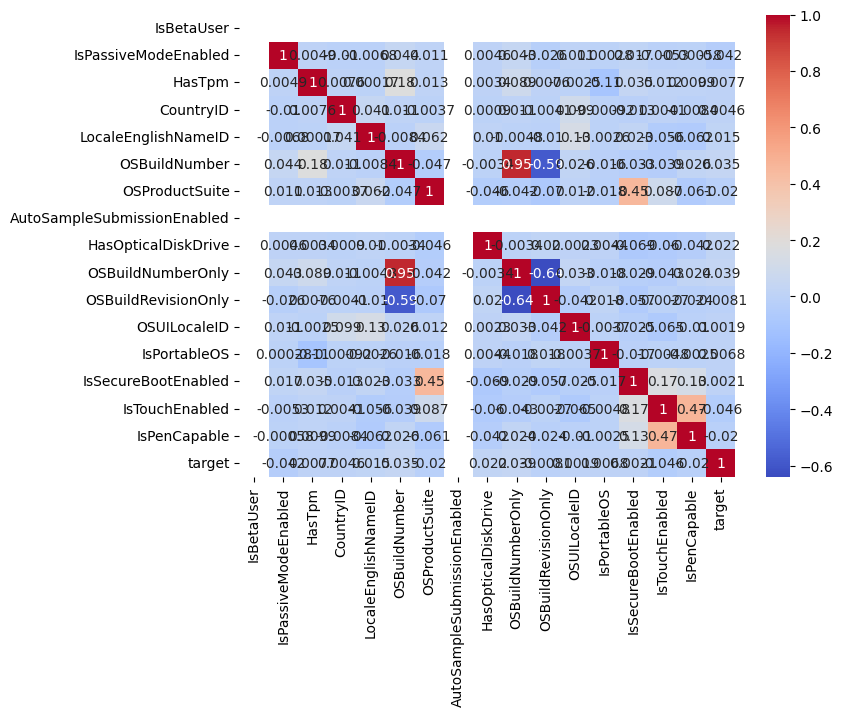

In [ ]:
numerical_features = train_df.select_dtypes(include = ['int64'])

plt.figure(figsize = (8,6))
sns.heatmap(numerical_features.corr(), annot =  True, cmap = 'coolwarm')
plt.show()

In [ ]:
numerical_features = numerical_features.drop(columns = ['AutoSampleSubmissionEnabled'])
numerical_features = numerical_features.drop(columns = ['IsBetaUser'])
numerical_features = numerical_features.drop(columns = ['OSBuildRevisionOnly'])
numerical_features = numerical_features.drop(columns = ['OSBuildNumber'])

train_df.drop(columns=['AutoSampleSubmissionEnabled', 'IsBetaUser', 'OSBuildRevisionOnly', 'OSBuildNumber'], inplace=True,axis = 1)



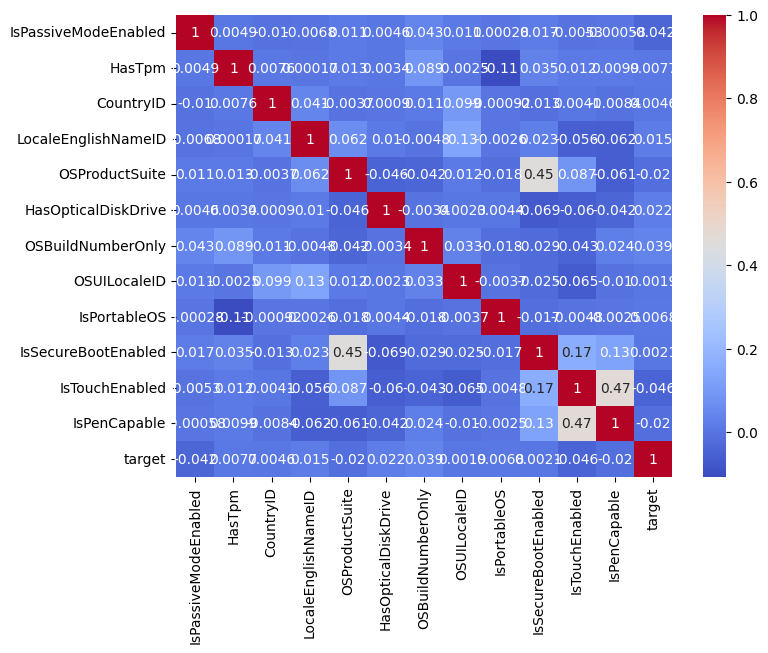

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(numerical_features.corr(), annot =  True, cmap = 'coolwarm')
plt.show()

# Boxplot of Numerical Features  


This visualization provides a clear summary of numerical feature distributions.  

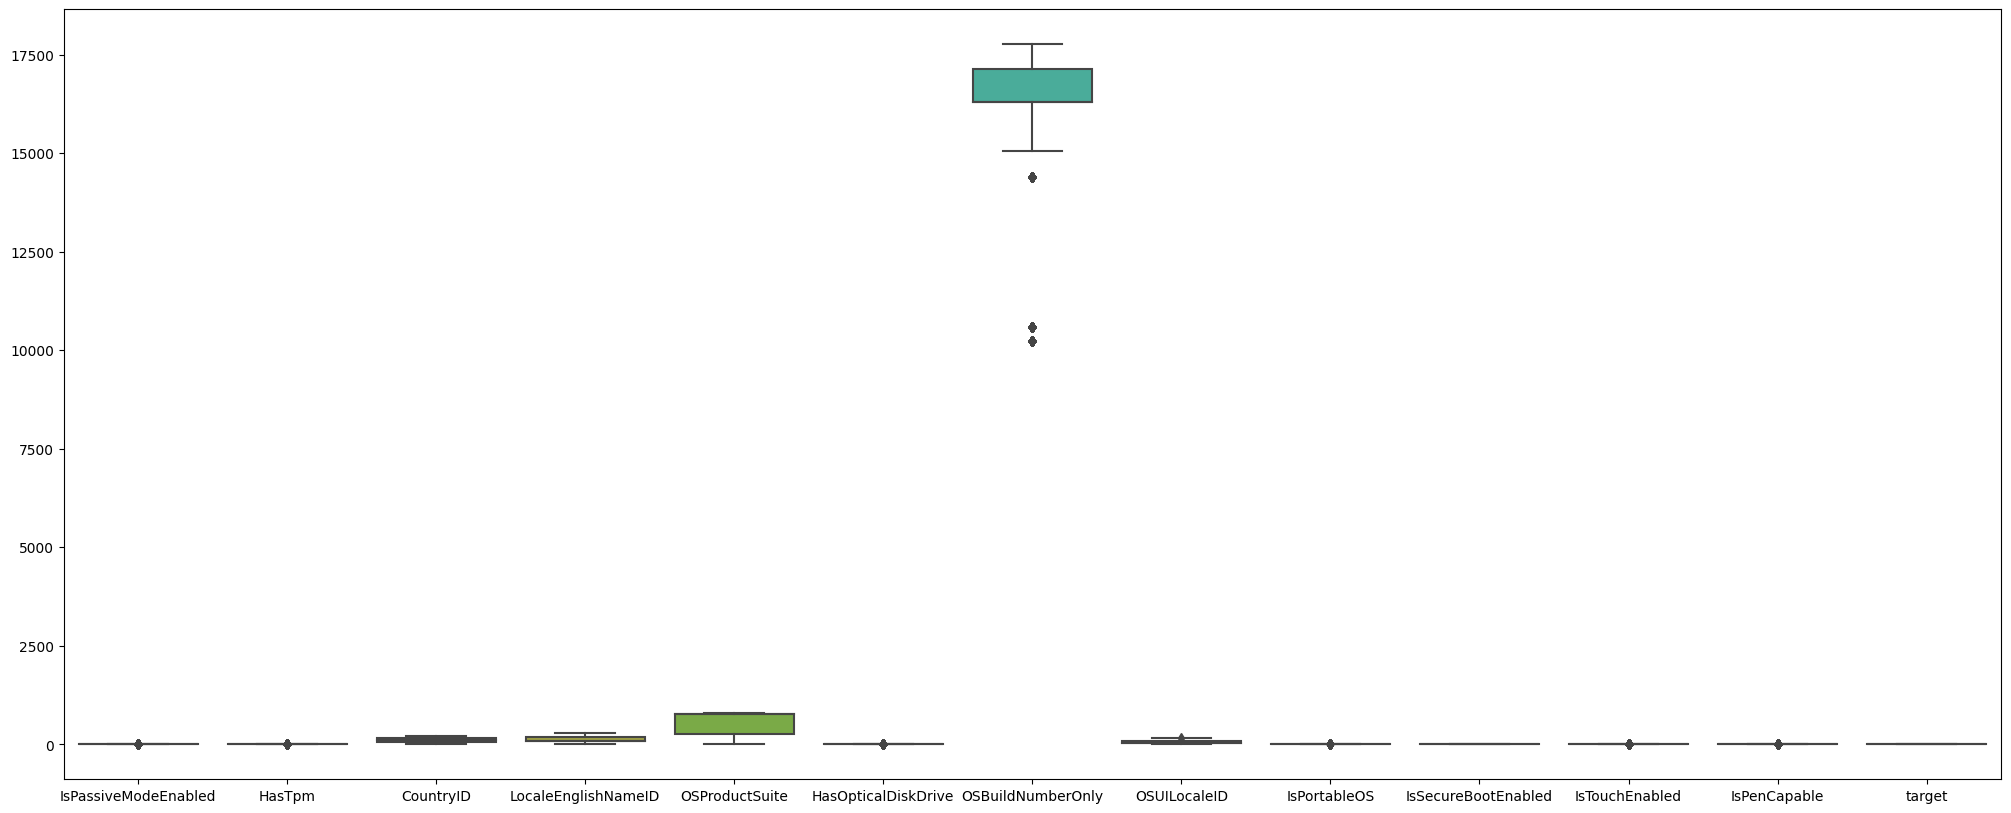

In [ ]:
plt.figure(figsize = (25,10))
sns.boxplot(numerical_features)
plt.show()

# Pairplot of Numerical Features  


This plot provides insights into how numerical features interact with each other.  

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

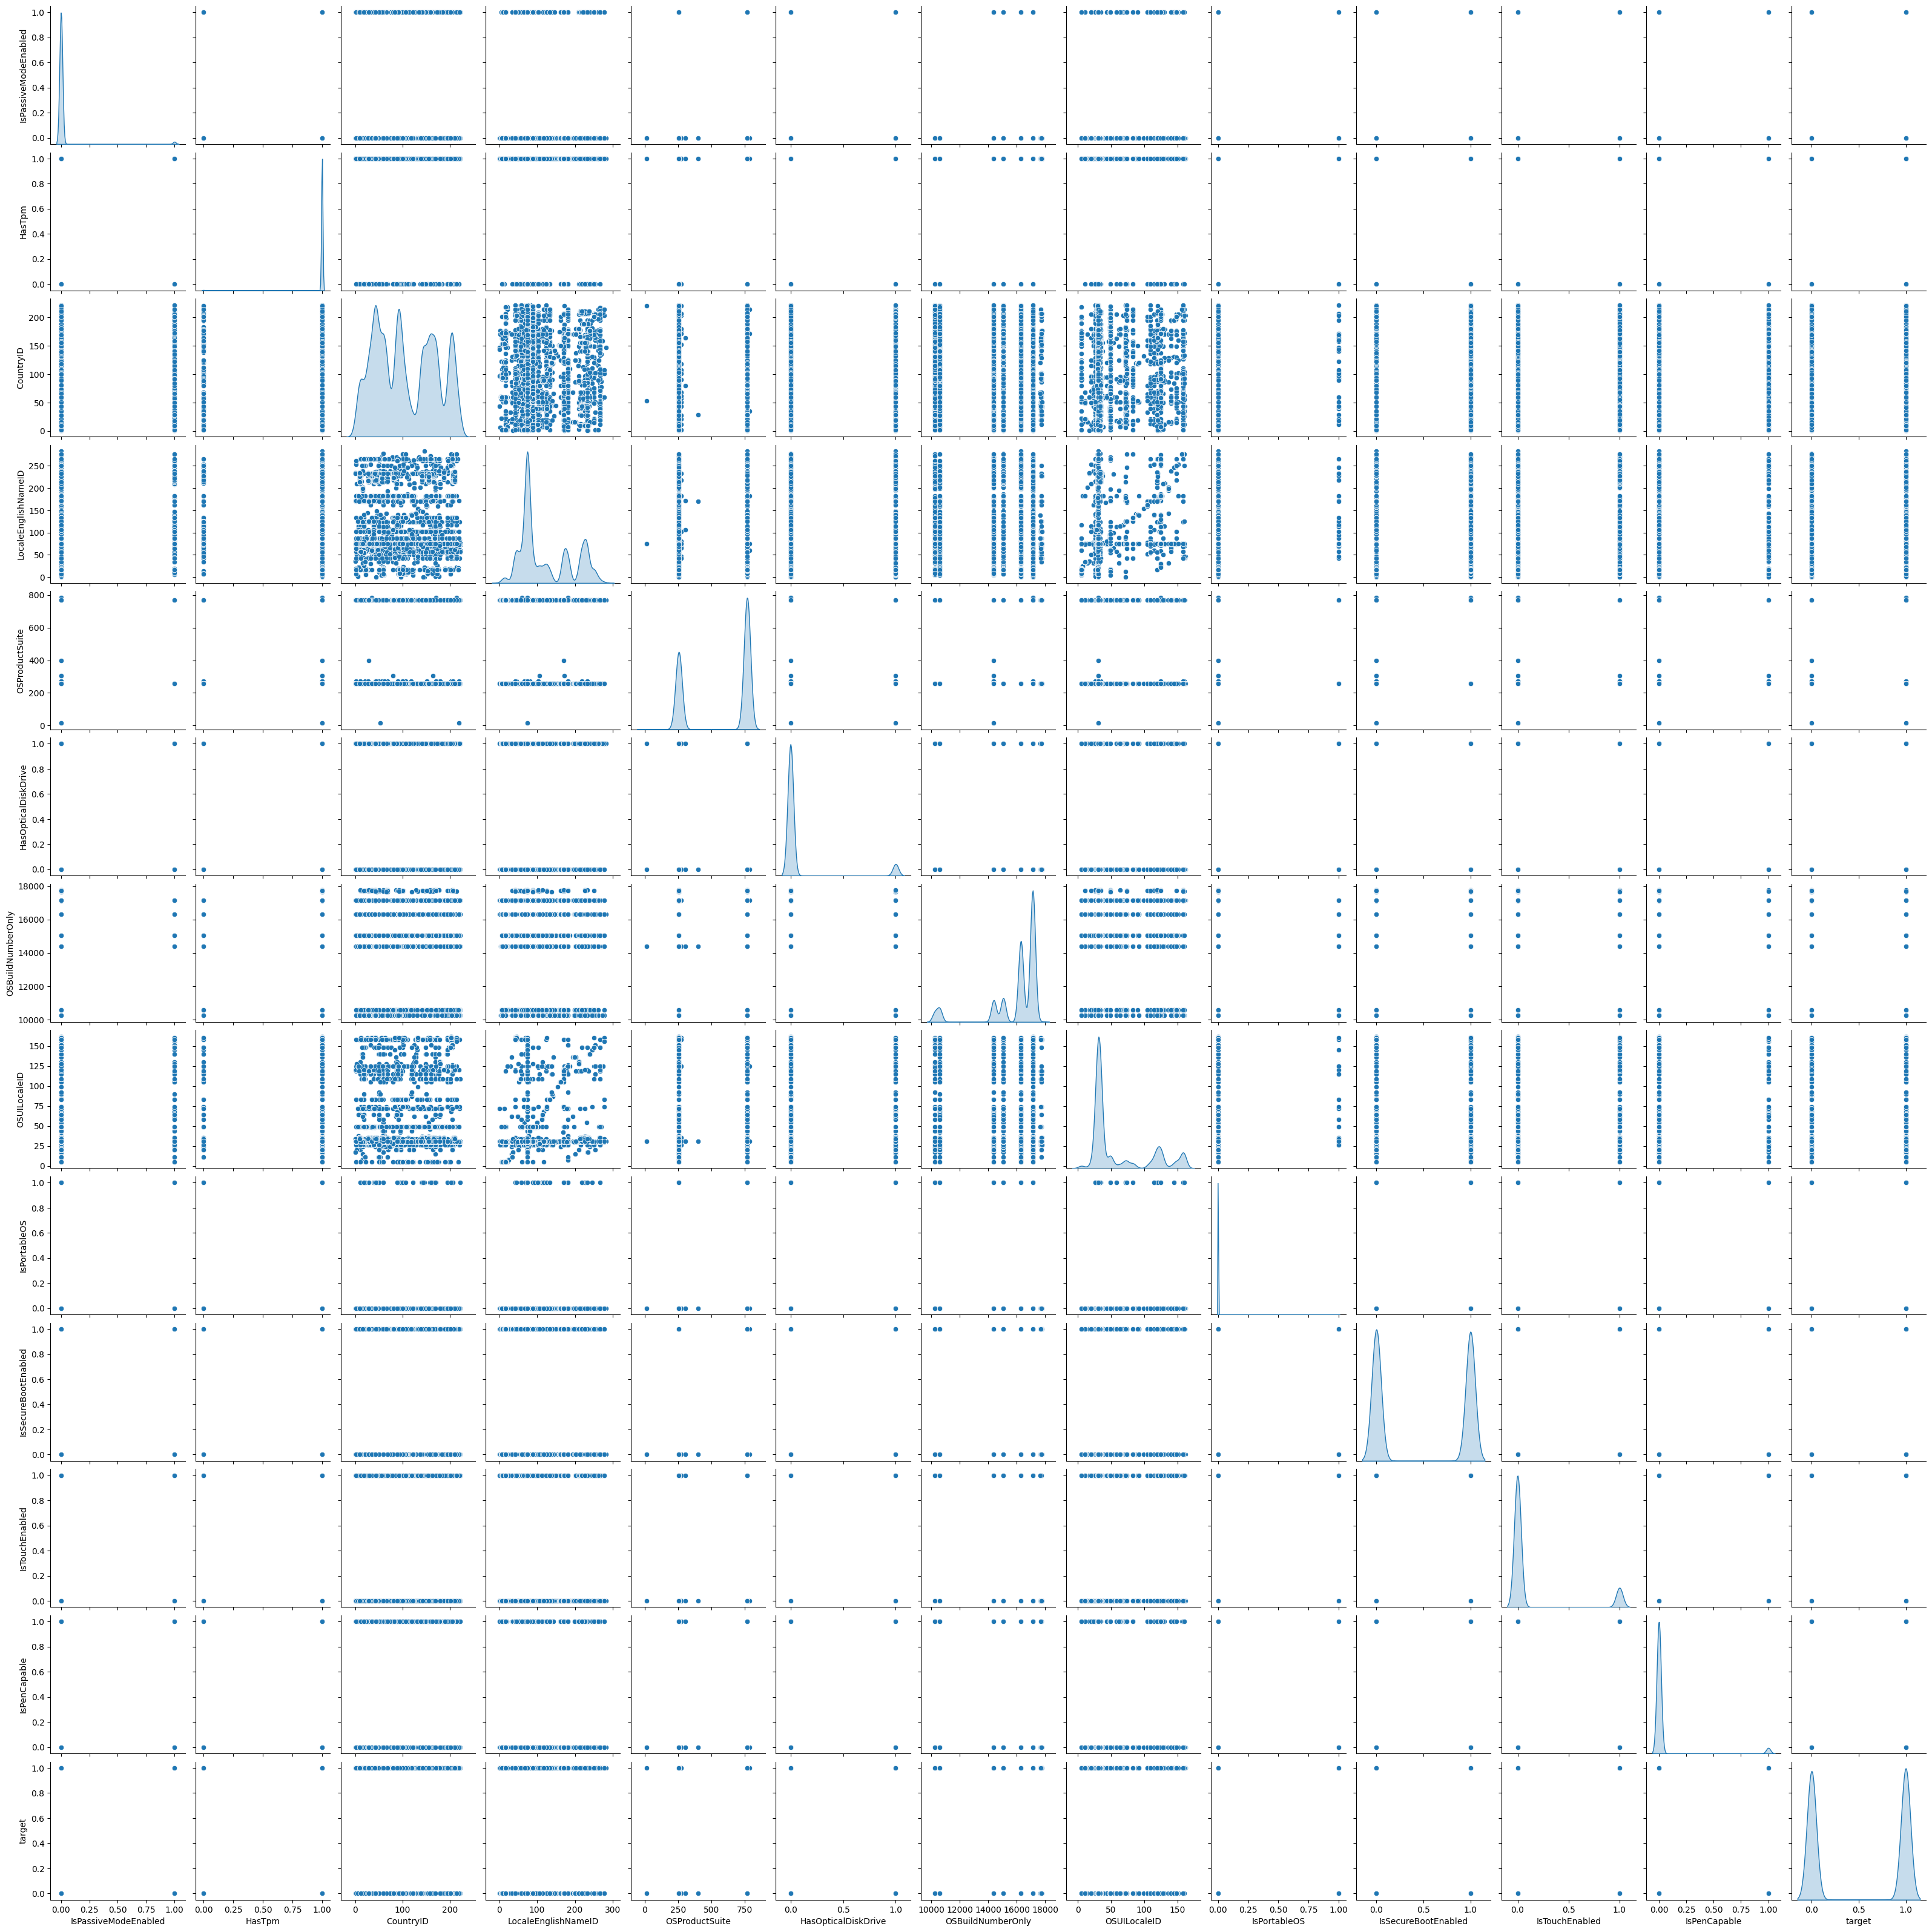

In [ ]:
sns.pairplot(numerical_features, diag_kind = 'kde')
plt.show()

# Stacked Bar Chart: PlatformType vs Target  

This visualization represents the distribution of the `target` variable across different `PlatformType` values using a stacked bar chart.  

This chart helps in analyzing how different platform types are associated with target categories.  

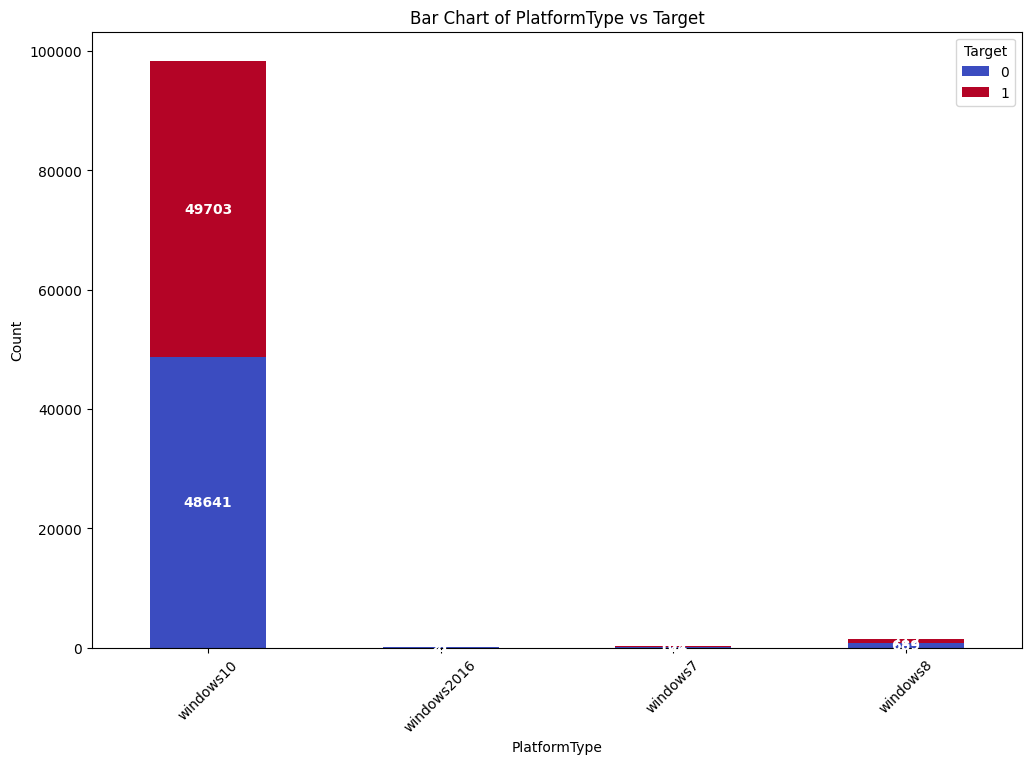

In [ ]:
pivot_table = train_df.groupby(['PlatformType', 'target']).size().unstack(fill_value=0)

ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='white', fontweight='bold')

plt.title('Bar Chart of PlatformType vs Target')
plt.xlabel('PlatformType')
plt.ylabel('Count')
plt.legend(title='Target')
plt.xticks(rotation=45)

plt.show()

In [ ]:
train_df.groupby('PlatformType')['target'].value_counts()

PlatformType  target
windows10     1         49703
              0         48641
windows2016   0            21
              1             8
windows7      0           124
              1           102
windows8      1           712
              0           689
Name: count, dtype: int64

# Stacked Bar Chart: ProductName vs Target  

This visualization groups and reshapes the data to show the distribution of the `target` variable across different `ProductName` values.



This helps in understanding the relationship between product names and their target classes.  

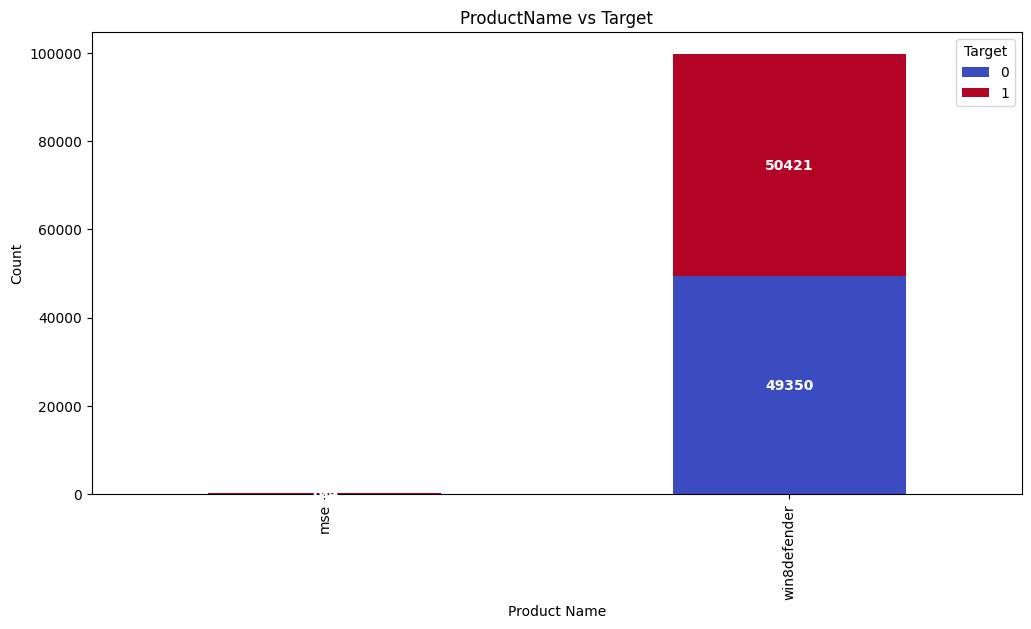

In [ ]:

pivot_table = train_df.groupby(['ProductName', 'target']).size().unstack(fill_value=0)

ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, label_type='center',color='white', fontweight='bold')

plt.title('ProductName vs Target')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Target')
plt.show()


In [ ]:
train_df.groupby('ProductName')['target'].value_counts()

ProductName   target
mse           0           125
              1           104
win8defender  1         50421
              0         49350
Name: count, dtype: int64

# Model

In [ ]:
X = train_df.drop("target", axis=1)
y = train_df["target"].copy()

In [ ]:
# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Dummy Classifier  



In [ ]:
from sklearn.dummy import DummyClassifier
model= DummyClassifier().fit(X,y)
y_pred = model.predict(test_df)

# Logistic Regression  

`LogisticRegression` is a machine learning algorithm used for classification. It predicts binary outcomes (0 or 1) using a logistic function. It is simple, fast, and effective for classification tasks.  

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10,random_state=2)

In [ ]:

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
pipeline = Pipeline([('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

model = pipeline.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'Local...
       'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName',
       'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType', 'ChassisType',
       'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch',
       'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
       'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
       'FlightRing', 'DateAS', 'DateOS'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [ ]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Score: {accuracy:.4f}")

Logistic Regression Score: 0.5931


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.56      0.57      4948
           1       0.59      0.63      0.61      5052

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000



In [ ]:
y_pred = model.predict(test_df)

In [ ]:
y_pred.shape

(10000,)

# Random Forest Classifier  

`RandomForestClassifier` is a machine learning algorithm that combines multiple decision trees for predictions. It is powerful, handles large datasets efficiently, and reduces overfitting by averaging the results of multiple trees.  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
# Transformers
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', max_categories=20))
])

In [ ]:
# Preprocessor
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [ ]:

# RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Fit the model
model2 = pipeline.fit(X_train, y_train)

In [ ]:
model2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'Local...
       'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType', 'ChassisType',
       'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch',
       'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
       'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
       'FlightRing', 'DateAS', 'DateOS'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_jobs=-1,
                                        random_state=42))])

In [ ]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.6186


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.53      0.57      4894
           1       0.61      0.71      0.65      5106

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.61     10000
weighted avg       0.62      0.62      0.62     10000



In [ ]:
y_pred = pipeline.predict(test_df)

In [ ]:
y_pred.shape

(10000,)

In [ ]:
#model 3

# XGBClassifier  

`XGBClassifier` is a gradient boosting algorithm known for its speed, power, and ability to handle large datasets efficiently. It enhances accuracy by combining multiple weak models and minimizing errors.  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

NameError: name 'X' is not defined

In [ ]:

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore', max_categories=20, sparse_output=False))
])


In [ ]:

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:

# Create a pipeline with preprocessing and XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2, eval_metric='logloss'))
])

# Train the pipeline
model3 = pipeline.fit(X_train, y_train)

model3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       '...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=2, ...))])

In [ ]:
# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")

XGBoost Accuracy: 0.6209


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.54      0.59      4948
           1       0.61      0.70      0.65      5052

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000



In [ ]:
y_pred = pipeline.predict(test_df)


In [ ]:
y_pred.shape

(10000,)

# Hyperparameter Tuning

We use `RandomizedSearchCV` for hyperparameter tuning as it is faster than `GridSearchCV`. It efficiently explores a subset of hyperparameters, making it ideal for optimizing model.  

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__reg_alpha': [0, 0.01, 0.1],
    'classifier__reg_lambda': [0.1, 1, 10]
}


In [ ]:
# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=5,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    random_state=2
)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'Ge...
                   param_distributions={'classifier__colsample_bytree': [0.6,
                                                                         0.8,
                                                                         1.0],
                                        'classifier__gamma': [0, 0.1, 0.2],
                                        'classifier__learning_rate': [0.01,
                                                                      0.05, 0.1,
                                                                      0.2],
                                        'classifier__max_depth': [3, 5, 7],
                                        'classifier__n_estimators': [100, 200,
                                                                     300],
                                        'classifier__reg_alpha': [0, 0.01, 0.1],
                                        'classifier__reg_lambda': [0.1, 1, 10],
                                        'classifier__subsample': [0.6, 0.8,
                                                                  1.0]},
                   random_state=2, scoring='accuracy')

In [ ]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.6204


In [ ]:
y_pred = best_model.predict(test_df)


In [ ]:
final = pd.DataFrame()
final["id"] = range(0, test_df.shape[0])
final["target"] = y_pred

final.to_csv('submission.csv', index=False)

In [ ]:
# submission = pd.DataFrame({"id": range(0, test_df.shape[0]),
#                             "target": y_pred})
# submission.to_csv('submission.csv',index=False)